In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Identify label column
label_col = 'Species'
feature_cols = [c for c in df.columns if c != label_col]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df[label_col])
class_names = le.classes_

# Features
X = df[feature_cols].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


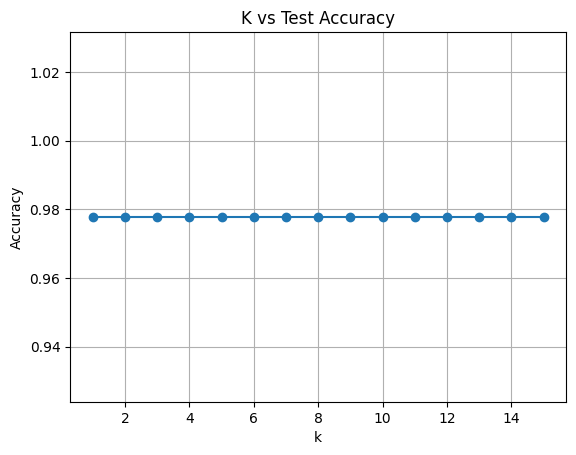

Best k: 1 with accuracy 0.9778


In [4]:
ks = list(range(1,16))
accuracies = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure()
plt.plot(ks, accuracies, marker='o')
plt.title("K vs Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = ks[np.argmax(accuracies)]
print(f"Best k: {best_k} with accuracy {max(accuracies):.4f}")


In [5]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


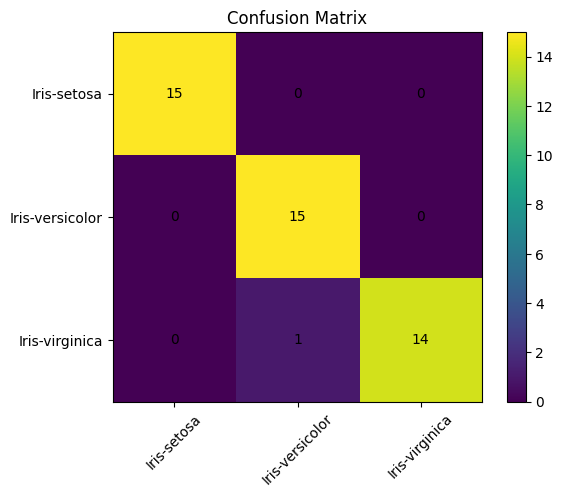

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


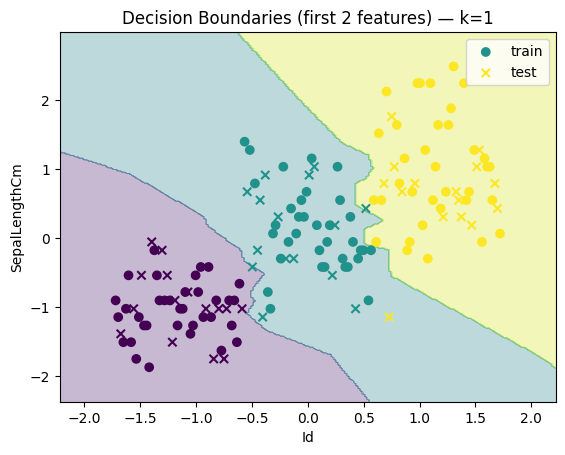

In [7]:
X2 = X_scaled[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.3, random_state=42, stratify=y
)

model2 = KNeighborsClassifier(n_neighbors=best_k)
model2.fit(X2_train, y2_train)

x_min, x_max = X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5
y_min, y_max = X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_train[:,0], X2_train[:,1], c=y2_train, marker='o', label='train')
plt.scatter(X2_test[:,0], X2_test[:,1], c=y2_test, marker='x', label='test')
plt.title(f"Decision Boundaries (first 2 features) — k={best_k}")
plt.xlabel(feature_cols[0])
plt.ylabel(feature_cols[1])
plt.legend()
plt.show()
